In [ ]:
!pip install anvil-uplink

In [ ]:
# api library for twitter
import tweepy
# for preprocessing the tweets
from textblob import TextBlob
# for visual representation of text data
from wordcloud import WordCloud
import pandas as pd
import numpy as np
# regular expression
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Twitter API info
# enter your own twitter credentials here
consumerKey = ''
consumerSecret = ''
accessToken = ''
accessTokenSecret = ''

In [ ]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:
# extract 100 tweets from twitter user
posts = api.user_timeline(screen_name="BarackObama", count=100, lang="en", tweet_mode="extended")
 
# print last 5 tweets of user
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i = i+1

1) Walter Mondale championed progressive causes and changed the role of VP—so leaders like @JoeBiden could be the last ones in the room when decisions were made. In selecting Geraldine Ferraro, he also paved the way for @VP to make history. Michelle and I send prayers to his family.

2) Charles and @Shaq agree: we can all help end this pandemic by getting the COVID-19 vaccine. It's the only way to keep everyone safe and help us get back to all the things we miss most—from seeing family and friends to watching sports in person. https://t.co/y2DlprGPds

3) RT @MichelleObama: Barack and I started Higher Ground to give exciting new voices a platform to tell great stories. We're proud to share Se…

4) After nearly two decades in Afghanistan, it’s time to recognize that we have accomplished all that we can militarily, and bring our remaining troops home. I support @POTUS’s bold leadership in building our nation at home and restoring our standing around the world. https://t.co/BrDzASXD3G

5) 

In [ ]:
# create a dataframe with tweets of user
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
 
df.head()

,Tweets
0,Walter Mondale championed progressive causes a...
1,Charles and @Shaq agree: we can all help end t...
2,RT @MichelleObama: Barack and I started Higher...
3,"After nearly two decades in Afghanistan, it’s ..."
4,Michelle and I are thrilled to be one step clo...


In [ ]:
# function to clean text
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #remove @mentions
  text = re.sub(r'#', '', text) #remove '#'
  text = re.sub(r'RT[\s]+', '', text) #remove RT
  text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlinks
  return text
 
# clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanText)
 
df.head()

,Tweets
0,Walter Mondale championed progressive causes a...
1,Charles and agree: we can all help end this p...
2,: Barack and I started Higher Ground to give e...
3,"After nearly two decades in Afghanistan, it’s ..."
4,Michelle and I are thrilled to be one step clo...


In [ ]:
# function to get subjectivity [0.0, 1.0]
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
 
# function to get polarity [-1, 1]
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
 
# add new columns to df
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
 
df.head()

,Tweets,Subjectivity,Polarity
0,Walter Mondale championed progressive causes a...,0.066667,0.000000
1,Charles and agree: we can all help end this p...,0.500000,0.166667
2,: Barack and I started Higher Ground to give e...,0.700909,0.457273
3,"After nearly two decades in Afghanistan, it’s ...",0.416667,0.133333
4,Michelle and I are thrilled to be one step clo...,0.418182,0.212121


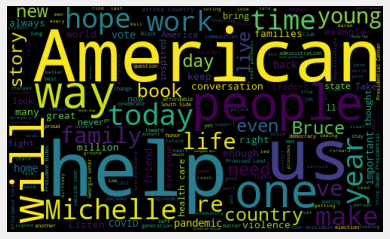

In [ ]:
# plot word cloud
allWords = ' '.join(tweets for tweets in df['Tweets'])
 
wordCloud = WordCloud(height=300, width=500, random_state=21, max_font_size=100).generate(allWords)
 
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [ ]:
# function to get the negative, positive and neutral analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 
# add new column of analysis in df
df['Analysis'] = df['Polarity'].apply(getAnalysis)
 
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,Walter Mondale championed progressive causes a...,0.066667,0.000000,Neutral
1,Charles and agree: we can all help end this p...,0.500000,0.166667,Positive
2,: Barack and I started Higher Ground to give e...,0.700909,0.457273,Positive
3,"After nearly two decades in Afghanistan, it’s ...",0.416667,0.133333,Positive
4,Michelle and I are thrilled to be one step clo...,0.418182,0.212121,Positive


In [ ]:
# print all the positive tweets
index = 1
 
sortedDF = df.sort_values(by=['Polarity']) # in ascending order
sortedDF.head()
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(index) + ') ' + sortedDF['Tweets'][i])
    index = index + 1

In [ ]:
index = 1

for i in range(0, df.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(index) + ') ' + sortedDF['Tweets'][i])
    index = index + 1

In [ ]:
index = 1
 
for i in range(0, df.shape[0]):
  if(sortedDF['Analysis'][i] == 'Neutral'):
    print(str(index) + ') ' + sortedDF['Tweets'][i])
    index = index + 1

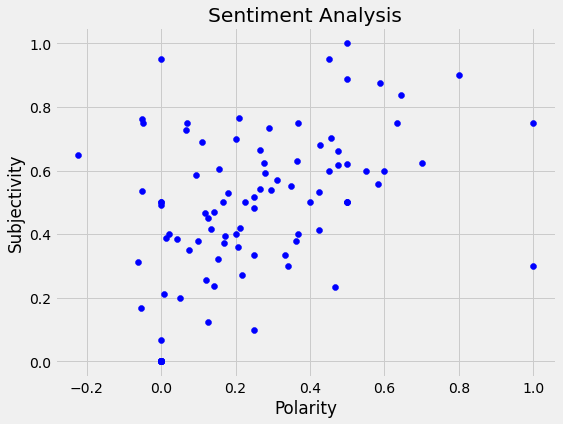

In [ ]:
# plot figure between polarity and subjectivity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
 
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

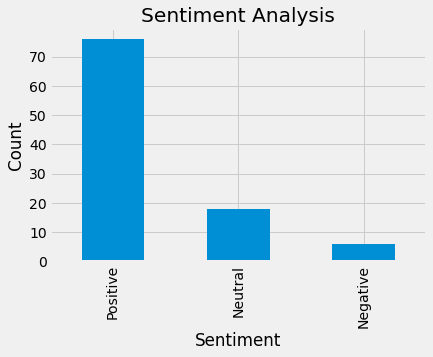

In [ ]:
# plot the value counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
import anvil.server
anvil.server.connect("enter app key here")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [ ]:
def sentiment_count(df):
  count = [0, 0, 0]
  for i in range(0, df.shape[0]):
    if df['Analysis'][i] == 'Positive':
      count[0] = count[0]+1
    elif df['Analysis'][i] == 'Negative':
      count[1] = count[1]+1
    else:
      count[2] = count[2]+1
  return count

In [ ]:
@anvil.server.callable
def predict_sentiment(twitter_handle):
  try:
    posts2 = api.user_timeline(screen_name=twitter_handle, count=100, lang="en", tweet_mode="extended")
  except ValueError:
    return -1
  df2 = pd.DataFrame([tweet.full_text for tweet in posts2], columns=['Tweets'])
  df2['Tweets'] = df2['Tweets'].apply(cleanText)
  df2['Polarity'] = df2['Tweets'].apply(getPolarity)
  df2['Analysis'] = df2['Polarity'].apply(getAnalysis)
  return sentiment_count(df2)

In [ ]:
anvil.server.wait_forever()